In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [3]:
## reading in the data

data_path = ('./yelp_labelled.txt')

rev_raw = pd.read_csv(data_path, delimiter= '\t', header=None)

rev_raw.columns = ['review', 'sentiment']

rev_raw_2  = rev_raw

In [4]:
## The first features list

keywords = ['great', 'very', 'go', 'best', 'do', 'good', 'try', 'really',
            'perfect','so', 'love', 'loved', 'recommend', 'wow', 'and','i']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    rev_raw[str(key)] = rev_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    




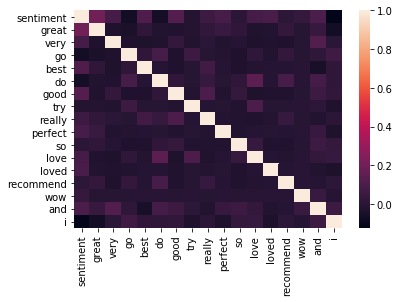

In [5]:
sns.heatmap(rev_raw.corr())

In [6]:
## getting the data ready for our test
data = rev_raw[keywords]
target = rev_raw['sentiment']

In [7]:
## conducting a naive_bayes test 
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 363


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred, labels=[1, 0])

array([[264, 236],
       [127, 373]])

In [13]:
print('Sensitivity: ' + str(373/(127+373)))
print('Specifity: ' + str(264/(264+236)))

Sensitivity: 0.746
Specifity: 0.528


In [14]:
 from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.66
Testing on Sample: 0.637


These numbers are basically saying that the machine is basically guessing, or a guess is as accurate in predicting the target. what if we add a feature that shows if the review had all caps or not

In [15]:
rev_raw['allcaps'] = rev_raw['review'].str.isupper()

With 20% Holdout: 0.615
Testing on Sample: 0.649


In [19]:
data2 = rev_raw[keywords + ['allcaps']]
target2 = rev_raw['sentiment']

In [20]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target2 != y_pred2).sum()
))

Number of mislabeled points out of a total 1000 points : 363


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target2, y_pred2)

array([[373, 127],
       [236, 264]])

In [22]:
print('Sensitivity: ' + str(373/(127+373)))
print('Specifity: ' + str(264/(264+236)))

Sensitivity: 0.746
Specifity: 0.528


What if we add a feature that shows whither the number of words in each review make a long sentense or not

In [24]:
# I will find the number of words in a string and will test if longer 
## or shorter reviews correlate with the sentemint of the review.
rev_raw['word_count'] = rev_raw['review'].str.split().str.len()

print(rev_raw.loc[rev_raw.sentiment == 1,'word_count'].mean())
print(rev_raw.loc[rev_raw.sentiment == 0,'word_count'].mean())

rev_raw['long_par'] = (rev_raw['word_count'] > 13)

10.29
11.498


In [25]:
data3 = rev_raw[keywords + ['allcaps', 'long_par']]
target3 = rev_raw['sentiment']
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data3, target3)

# Classify, storing the result in a new variable.
y_pred3 = bnb.predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target3 != y_pred3).sum()
))

Number of mislabeled points out of a total 1000 points : 351


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target3, y_pred3)

array([[421,  79],
       [272, 228]])

In [27]:
print('Sensitivity: ' + str(421/(79+421)))
print('Specifity: ' + str(228/(272+228)))

Sensitivity: 0.842
Specifity: 0.456


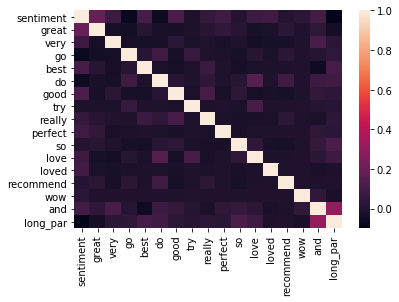

In [112]:
sns.heatmap(rev_raw.loc[:, rev_raw.columns != 'word_count'].corr())

In [117]:
data = rev_raw[keywords + ['long_par']]
target = rev_raw['sentiment']
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 349


In [118]:
confusion_matrix(target, y_pred)

array([[425,  75],
       [274, 226]])

In [82]:
(354)/1000 - 1

-0.646

In [123]:
data = rev_raw[keywords + ['long_par']]
target = rev_raw['sentiment']
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 351


In [124]:
confusion_matrix(target, y_pred)

array([[421,  79],
       [272, 228]])

In [ ]:
import nltk
nltk.download() 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [13]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

In [16]:
rev_raw['review'] = rev_raw['review'].apply(review_to_words)

0                                        wow loved place
1                                             crust good
2                                    tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                            selection menu great prices
5                            getting angry want damn pho
6                                   honeslty taste fresh
7      potatoes like rubber could tell made ahead tim...
8                                            fries great
9                                            great touch
10                                        service prompt
11                                         would go back
12     cashier care ever say still ended wayyy overpr...
13          tried cape cod ravoli chicken cranberry mmmm
14                      disgusted pretty sure human hair
15                           shocked signs indicate cash
16                                    highly recommended
17                          wai

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = 'word',   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 


In [19]:
train_data_features = vectorizer.fit_transform(rev_raw['review'])

In [27]:
from sklearn.naive_bayes import BernoulliNB
data = train_data_features
target = rev_raw['sentiment']
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 55


In [29]:
   from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.74
Testing on Sample: 0.945


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[476,  24],
       [ 31, 469]])

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([ 0.8 ,  0.69,  0.78,  0.73,  0.73,  0.82,  0.76,  0.78,  0.7 ,  0.82])

In [33]:
rev_raw['long_par'] = (rev_raw['word_count'] > 13)

KeyError: 'word_count'

In [34]:
rev_raw['word_count'] = rev_raw['review'].str.split().str.len()

print(rev_raw.loc[rev_raw.sentiment == 1,'word_count'].mean())
print(rev_raw.loc[rev_raw.sentiment == 0,'word_count'].mean())

5.374
5.596


In [35]:
rev_raw['long_par'] = (rev_raw['word_count'] > 13)

In [85]:
data = np.append(train_data_features, rev_raw['long_par'].values.reshape(-1, 1) * 1, axis=1 )
target = rev_raw['sentiment']
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 55


In [40]:
train_data_features = train_data_features.to()

In [82]:
train_data_features.shape

(1000, 1890)

In [84]:
(rev_raw['long_par'].values.reshape(-1, 1) * 1).shape

(1000, 1)

In [86]:
data.shape

(1000, 1891)

In [87]:
   from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.735
Testing on Sample: 0.945
